In [350]:
%matplotlib inline
import cv2
import glob
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [452]:
# input_dir_msi_181119 = "./Yonsei_colon_MSI_predictions/Kang_COLON_WSI_181119_tiled_normalized_v1"
# input_dir_msi_181211 = "./Yonsei_colon_MSI_predictions/Kang_COLON_WSI_181211_tiled_normalized_v1"
input_dir_msi_Kang_MSI = "./Yonsei_colon_MSI_predictions/Kang_MSI_WSI_2019_10_07_tiled_normalized_v1"
# input_dir_tils_181119 = "./Yonsei_tils_map/181119"
# input_dir_tils_181211 = "./Yonsei_tils_map/181211"
input_dir_tils_Kang_MSI = "./Yonsei_tils_map/Kang_MSI_WSI_2019_10_07"

# input_imgs_msi_181119 = glob.glob(input_dir_msi_181119+"/*.png")
# input_imgs_msi_181211 = glob.glob(input_dir_msi_181211+"/*.png")
input_imgs_msi_Kang_MSI = glob.glob(input_dir_msi_Kang_MSI+"/H*.png")

# input_imgs_tils_181119 = glob.glob(input_dir_tils_181119+"/*color.png")
# input_imgs_tils_181211 = glob.glob(input_dir_tils_181211+"/*color.png")
input_imgs_tils_Kang_MSI = glob.glob(input_dir_tils_Kang_MSI+"/H*color.png")

input_imgs_msi = input_imgs_msi_Kang_MSI
input_imgs_tils = input_imgs_tils_Kang_MSI

input_imgs_msi.sort()
input_imgs_tils.sort()

# for file in input_imgs_msi:
#     image_name = file.split('/')[-1].split('.')[0]
#     print(image_name+'\t')

# for file in input_imgs_tils:
#     image_name = file.split('/')[-1].split('_')[0]
#     print(image_name+'\t')

In [453]:
# scale_percent = 43.8
# width = int(img_tils.shape[1] * scale_percent / 100)
# height = int(img_tils.shape[0] * scale_percent / 100)
dim = (81, 196)
images_msi = []
images_tils = []
mapped = zip(input_imgs_msi, input_imgs_tils)
for path_msi, path_tils in mapped:
    img_msi = cv2.imread(path_msi, cv2.IMREAD_UNCHANGED)
    img_tils = cv2.imread(path_tils, cv2.IMREAD_UNCHANGED)
    # resize image
    resized_tils = cv2.resize(img_tils, dim, interpolation = cv2.INTER_AREA)
    images_msi.append(img_msi[:,:,:3])
    images_tils.append(resized_tils)


In [454]:
# find the total number of pixels on each image
n_total = []
mapped = zip(images_msi, images_tils)
for img_msi, img_tils in mapped:
    # find ratio b, g, r
    n_blue = len(img_tils[img_tils[:, :, 0] == 255])
    n_red = len(img_tils[img_tils[:, :, 2] == 255])
    n_total.append(n_red+n_blue)

In [455]:
ratio_msi = []
ratio_tils = []
mapped = zip(n_total, images_msi, images_tils)
for total, img_msi, img_tils in mapped:
    n_red = len(img_tils[img_tils[:, :, 2] == 255])
    ratio_tils.append(n_red/total)
    # find ratio white/black
    n_white = len(img_msi[img_msi[:, :, 0] > 0])
    ratio_msi.append(n_white/total)
#     print ("{0:.4f}".format(n_red/total))

In [456]:
d = {'MSI': ratio_msi, 'TILs': ratio_tils}
df = pd.DataFrame(data=d)
x, y = pd.Series(df['MSI'], name="x_var"), pd.Series(df['TILs'], name="y_var")
rho, pval = spearmanr(x,y)

rho=0.29 pval=0.02


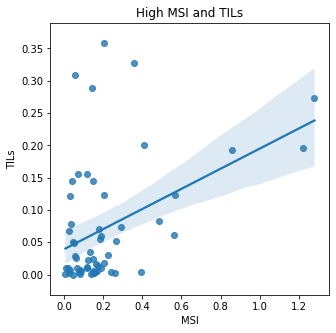

In [458]:
f, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x="MSI", y="TILs", data=df, ax=ax)
ax.set_title('High MSI and TILs')
print ("rho={0:.2f}".format(rho), "pval={0:.2f}".format(pval))